In [2]:
# TERCEIRA TENTATIVA DE MELHORAR OS RESULTADOS.
# AQUI USEI ALGUMAS REFERENCIAS E FOI NESSA QUE CONSEGUI O MELHOR SCORE 0.79186

# IMPORT DATA MANAGEMENT AND VISUALIZATION LIBS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# References:
# 1 - https://www.kaggle.com/code/goldens/titanic-on-the-top-with-a-simple-model/notebook
# 2 - https://medium.com/i-like-big-data-and-i-cannot-lie/how-i-scored-in-the-top-9-of-kaggles-titanic-machine-learning-challenge-243b5f45c8e9

sns.set()

In [3]:
# FEATURES
# survival -> Survival - 0 = No, 1 = Yes
# pclass   -> Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
# sex      -> Sex
# Age      -> Age in years
# sibsp    -> # of siblings / spouses aboard the Titanic
# parch    -> # of parents / children aboard the Titanic
# ticket   -> Ticket number
# fare     -> Passenger fare
# cabin    -> Cabin number
# embarked -> Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
# LOAD TRAIN AND TEST DATASET
df_train = pd.read_csv("../dataset/titanic/train.csv")
df_test = pd.read_csv("../dataset/titanic/test.csv")
df_train.head()

df = pd.concat([df_train.loc[:, df_train.columns != "Survived"], df_test])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [6]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [9]:
df["SibSp"].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [10]:
df["Parch"].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

## Plots

Abaixo faço alguns plots para entender como os dados estão distribuídos e como eles influenciam no 
resultado que no caso é se a pessoa sobreviveu ou não.

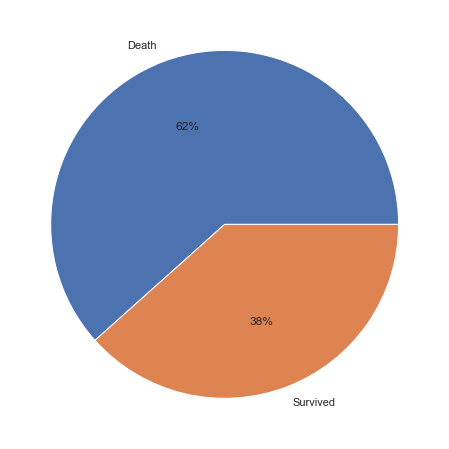

In [11]:
# PLOT QUE MOSTRA A PORDENTAGEM DE MANEIRA GERAL DE SOBREVIVENTES E MORTOS
fig = plt.figure(figsize=(10, 8))
plt.pie(df_train["Survived"].value_counts(), labels=["Death", "Survived"] ,autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

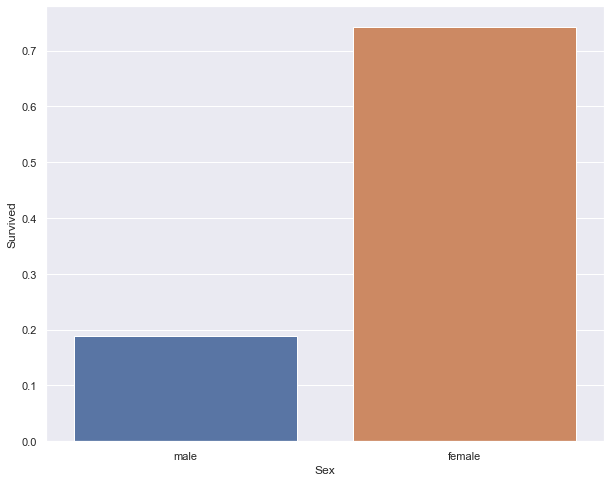

In [12]:
# AGORA AGRUPANDO POR SEXO.
# PODEMOS VER QUE SE FOR HOMEM A CHANCE DE MORRER É BEM GRANDE
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=df_train, y="Survived", x="Sex", ci=False)

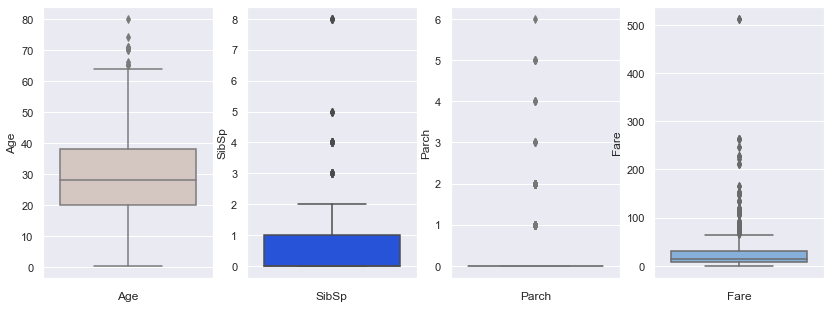

In [13]:
# AQUI Ë FEITA UMA ANALISE DA DISTRIBUIÇÃO DOS DADOS USANDO O BOXPLOT
# PODEMOS VER QUE EXISTEM OUTLIERS, PORÉM NÃO VOU RETIRA LOS, MESMO SENDO CONSIDERADOS OUTLIERS ESSES
# DADOS SÃO BEM CARACTERISTICOS E DIZEM BASTANTE SOBRE ESSA PESSOA

numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

plt.figure(figsize=(14,5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 4, i+1)
    sns.boxplot(data=df_train, y=feature, color=np.random.randint([255,255,255])/255)
    plt.xlabel(feature)

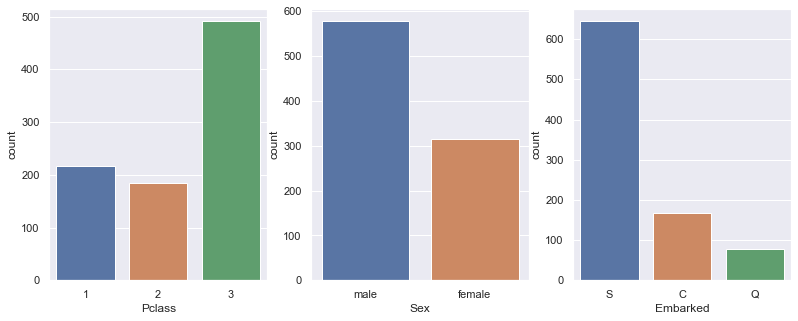

In [14]:
# AQUI FAÇO UMA ANALISE DOS NUMEROS ABSOLUTOS DE PESSOAS AGRUPADOS POR CLASSE, SEXO E ONDE EMBARCOU
# PODEMOS VER QUE AMBAS AS FEATURES SÃO IMPORTANTES, POIS A QUANTIDADE DE MORTES OU SOBREVIVENTES SÃO 
# BEM DIFERENTES. 
# DESTAQUE NOVAMENTE PARA A CLASSE 3 QUE POSSUI A MAIOR QUANTIDADE DE PESSOAS, EXISTEM MAIS HOMENS QUE MULHERES
# E A MAIORIA EMBARCOU EM S
plt.figure(figsize=(18,5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 4, i+1)
    sns.countplot(data=df_train, x=feature)
    plt.xlabel(feature)

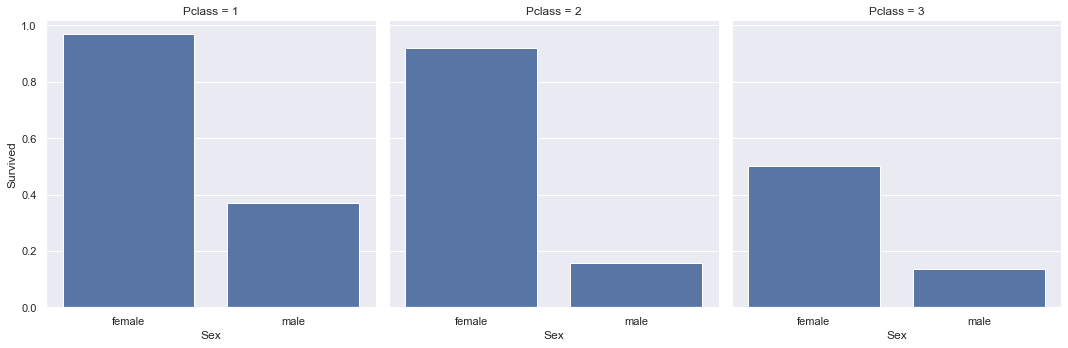

In [15]:
# OUTRA ANALISE AGORA DIVIDINDO POR CLASSE E SEXO
# AS CLASSES 1 e 2 POSSUEM A MAIOR PROPORÇÃO DE SOBREVIVENTES
# ENQUANDO A 3 POSSUI A MENOR
grid = sns.FacetGrid(data=df_train, col="Pclass", height=5)
grid.map(sns.barplot, "Sex", "Survived", ci=False, order=['female', 'male'])
plt.show()

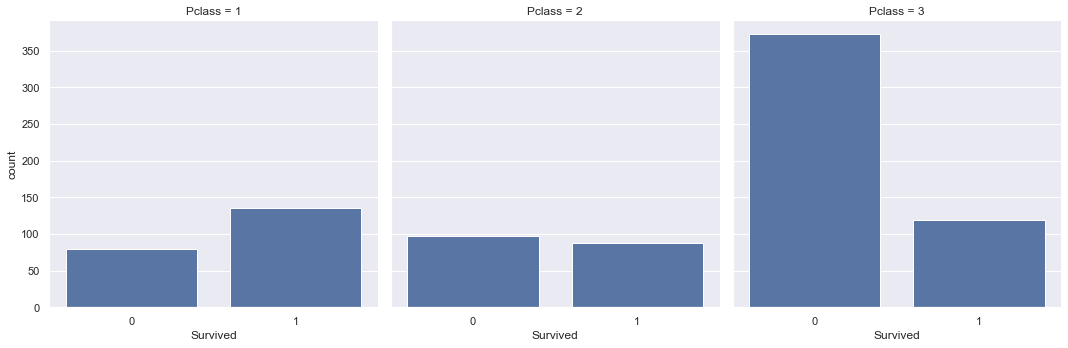

In [16]:
# ANALISANDO POR NUMEROS ABSOLUTOS VEMOS QUE NA CLASSE 3 A ESMAGARODA MAIORIA ACABA MORRENDO, É A CLASSE COM 
# MAIOR QUANTIDADE DE PESSOAS
grid = sns.FacetGrid(data=df_train, col="Pclass", height=5)
grid.map(sns.countplot, "Survived", order=[0, 1])
plt.show()

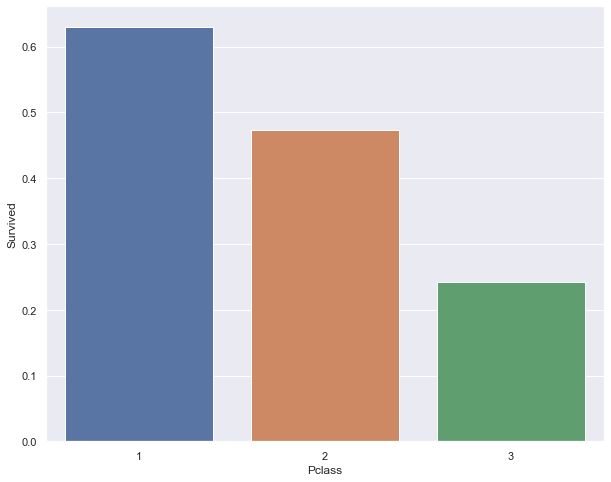

In [17]:
# NOVAMENTE UMA ANALISE DA PROPORÇÃO DE SOBREVIVENTES POR CLASSE 
fig = plt.figure(figsize=(10,8))
sns.barplot(data=df_train, x="Pclass", y="Survived", ci=False)
plt.show()

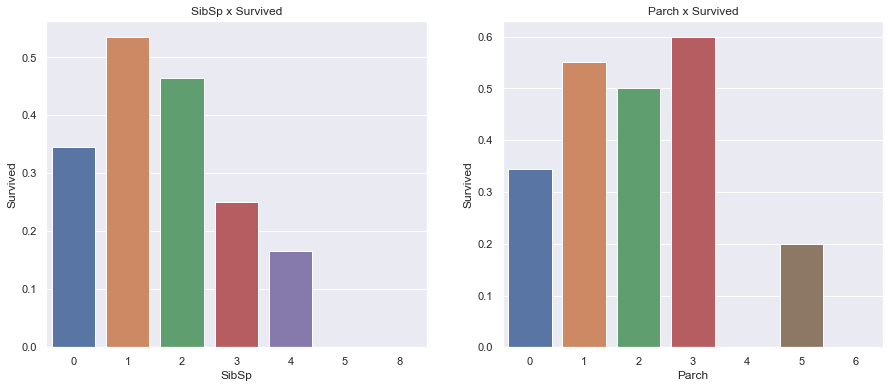

In [18]:
# AGORA É FEITA UMA ANALISE SE O NUMERO DE PARENTES INFLUENCIA NA SOBREVIVENCIA
# OS PLOTS MOSTRAM QUE EXISTEM SIM UMA RELAÇÃO ENTRE O NUMERO DE PARENTE E A SOBREVIVENCIA
# POREM NÃO DE MANEIRA CONCLUSIVA.
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(data=df_train, x="SibSp", y="Survived", ci=False)
plt.title("SibSp x Survived")

plt.subplot(1, 2, 2)
sns.barplot(data=df_train, x="Parch", y="Survived", ci=False)
plt.title("Parch x Survived")

plt.show()

Text(0.5, 1.0, 'SibSp x Survived x Sex')

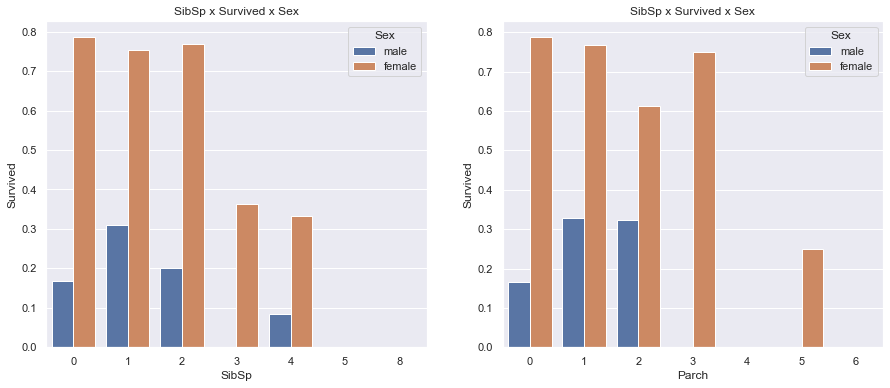

In [30]:
# SibSp x Survived x Sex
# NOVAMENTE, MULHERES TEM UMA MAIOR PROPORÇÃO DE SOBREVIVENTES
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.barplot(data=df_train, x="SibSp", y="Survived", ci=False, hue="Sex")
plt.title("SibSp x Survived x Sex")

plt.subplot(1, 2, 2)
sns.barplot(data=df_train, x="Parch", y="Survived", ci=False, hue="Sex")
plt.title("SibSp x Survived x Sex")

In [ ]:
# USANDO O EXEMPLO DA REFERNCIA 1, ONDE SE SOMA ESSAS DUAS FEATURES ACABA SENDO MAIS INTUITIVO
df_temp = df_train
df_temp["Family"] = df_temp["SibSp"] + df_temp["Parch"]

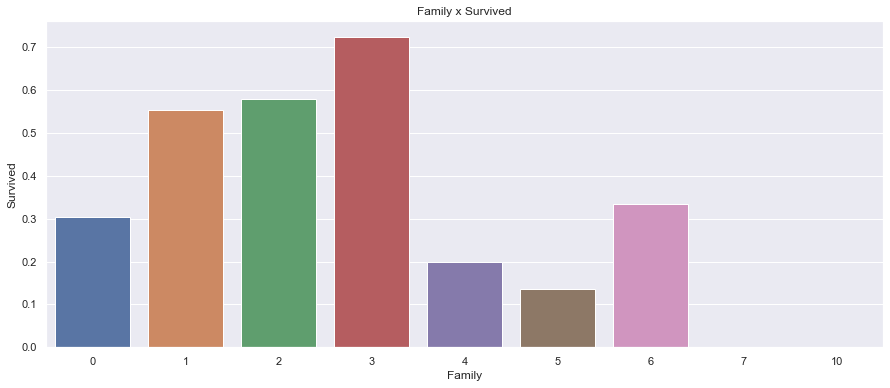

In [31]:
# AGORA PODEMOS TER UMA IDEIA MELHOR DE COMO TER FAMILIARES INFLUENCIA NA SOBREVIVENCIA
# A PROPORÇÃO MOSTRA QUE QUEM TEM 1, 2 ou 3 PARENTES TEM MAIOR CHANCE DE SOBREVIVER, VAMOS ANALISAR 
# VALORES ABSOLUTOS ...
plt.figure(figsize=(15,6))
sns.barplot(data=df_temp, x="Family", y="Survived", ci=False)
plt.title("Family x Survived")

plt.show()

Text(0.5, 1.0, 'Family x Survived')

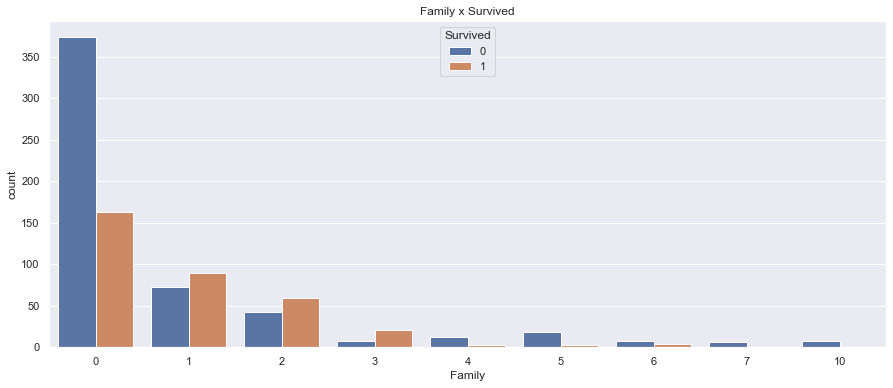

In [32]:
# DE MANEIRA ABSOLUTA VEMOS QUE QUEM TEM ENTRE 1 e # PARENTES TEM MAIOR CHANCE DE SOBREVIVER. 
# NOTA SE TAMBEM QUE QUEM NÃO POSSUI PARENTES TEM GRANDE CHANCE DE MORRER
plt.figure(figsize=(15,6))
sns.countplot(data=df_train, x="Family", hue="Survived")
plt.title("Family x Survived")

## Age

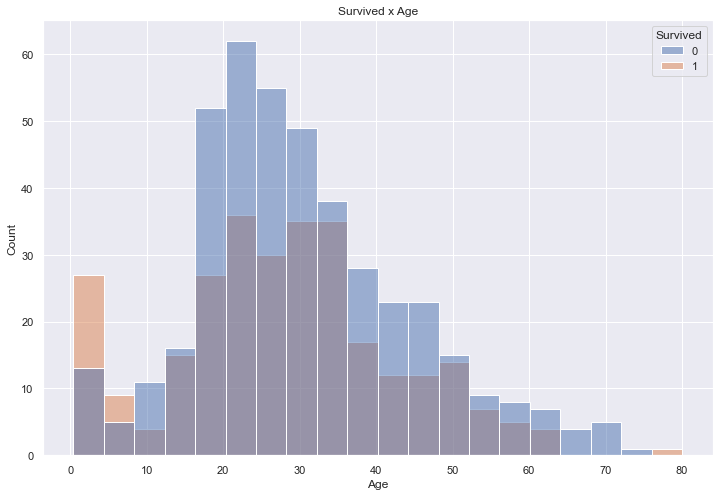

In [29]:
# SURVIVED x AGE
# PODEMOS VER QUE A GRANDE QUANTIDADE DE MORTES E SOBREVIVENTES ACONTECE NO RANGE MAIS OU MENOS DE 16 ANOS 
# ATÉ MAIS OU MENOS 36
plt.figure(figsize=(12,8))
sns.histplot(data=df_train, x="Age", hue="Survived")
plt.title("Survived x Age")
plt.show()

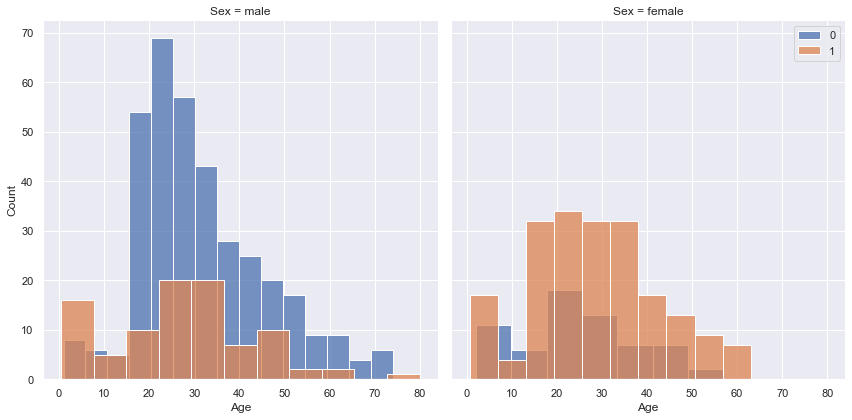

In [33]:
# DIVIDE BY SEX WE CAN SEE THAT THE DEATH MAJORITY IS MALE AND MAJORITY SURVIVED IS FEMALE
# DIVIDINDO POR SEXO VEMOS MAIS UMA VEZ QUE A GRANDE MAIORIA DE MORTES OCORRE NO SEXO MASCULINO
grid = sns.FacetGrid(data=df_train, col="Sex", hue="Survived", height=6)
grid.map(sns.histplot, "Age")
plt.legend()
plt.show()

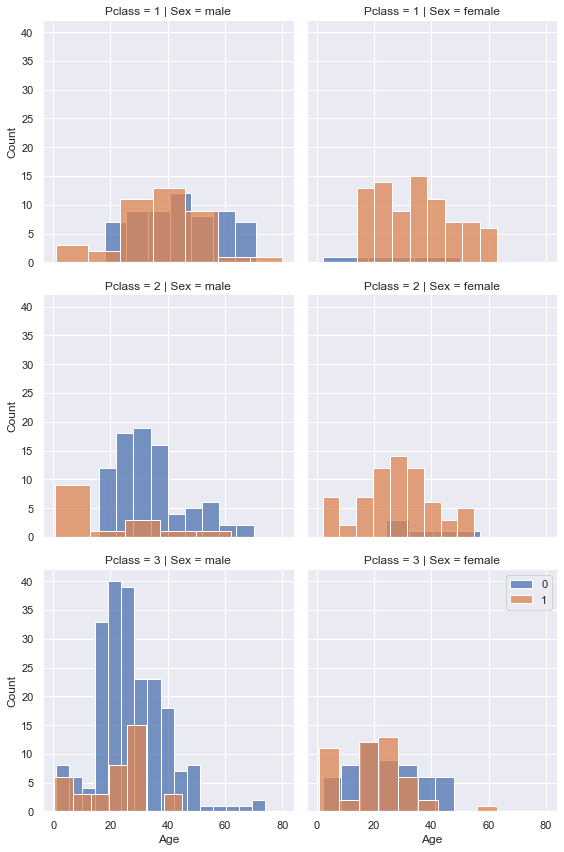

In [31]:
# SEEING BY CLASS WOMEN IN THE CLASS 1 AND 2 HAVE A BIG AMOUNT OF SURVIVE, THE MAJORITY DEATH OCCOUR IN THE CLASS 3.
# FOR THE MEN THE CLASS 1 HAVE THE AMOUNT OF SURVIVE, CLASS 2 THE DEATH INCREASES AND IN CLASS 3 THE MAJORITY DEATH OCCOUR
# DIVIDO AGORA POR CLASSE E POR SEXO. NOVAMENTE A 3 CLASSE É A QUE POSSUI MAIOR QUANTIDADE DE MORTES
# O DETALHE AQUI É NA CLASSE 2, O NUMERO DE HOMENS DA CLASSE 2 QUE MORRERAM É BEM GRANDE
grid = sns.FacetGrid(data=df_train, col="Sex", row="Pclass", hue="Survived", height=4)
grid.map(sns.histplot, "Age")
plt.legend()
plt.show()

## Fare

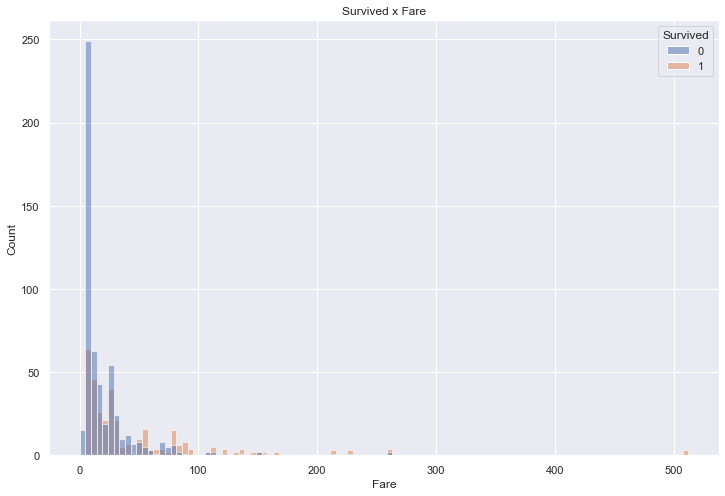

In [32]:
# ANALISE DE QUANTO FOI PAGO E O NUMERO DE SOBREVIVENTES
# A ESMAGARA QUANTIDADE DE PESSOAS QUE MORRERAM FORAM AS QUE PAGARAM MENOS QUE 70 OU 80 COM DESTAQUE PARA QUEM
# PAGOU PROXIMO DE 5 OU 10.
plt.figure(figsize=(12,8))
sns.histplot(data=df_train, x="Fare", hue="Survived")
plt.title("Survived x Fare")
plt.show()

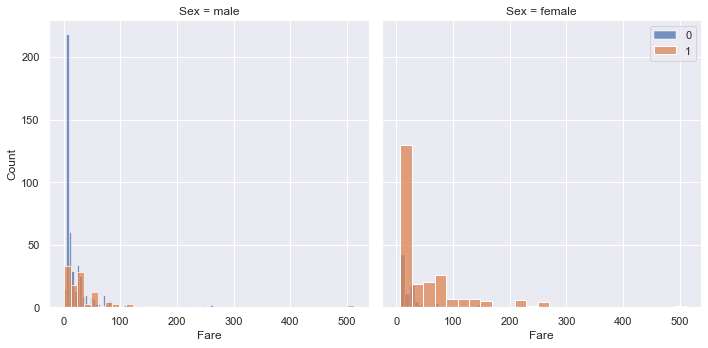

In [33]:
grid = sns.FacetGrid(data=df_train, col="Sex", hue="Survived", height=5)
grid.map(sns.histplot, "Fare")
plt.legend()
plt.show()

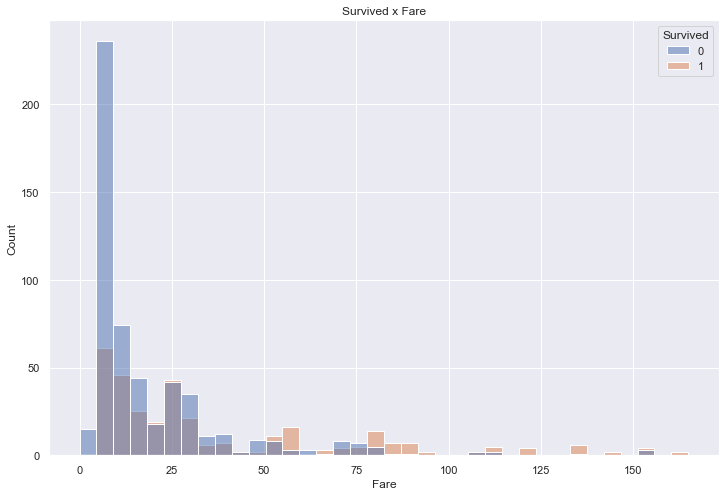

In [34]:
# AQUI RETIREI OS VALORES MAIS ALTOS PARA SER MELHOR A VISUALIZAÇÃO DAS INFORMAÇÕES
# FICA MAIS CLARO VISUALIZAR AGORA
plt.figure(figsize=(12,8))
sns.histplot(data=df_train.loc[df_train["Fare"] < 200], x="Fare", hue="Survived")
plt.title("Survived x Fare")
plt.show()

## Embarked

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

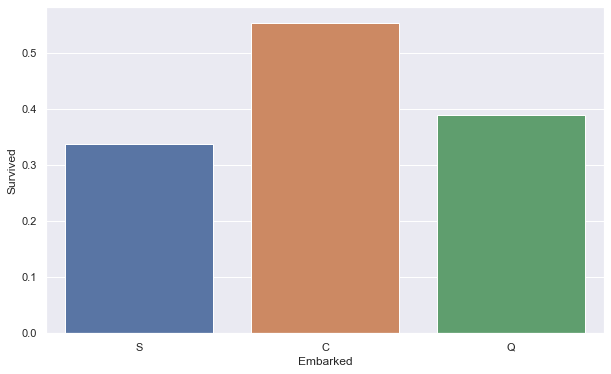

In [35]:
# C TEM UMA MAIOR PROPORÇÃO DE SOBREVIVENTES
plt.figure(figsize=(10,6))
sns.barplot(data=df_train, x="Embarked", y="Survived", ci=False)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

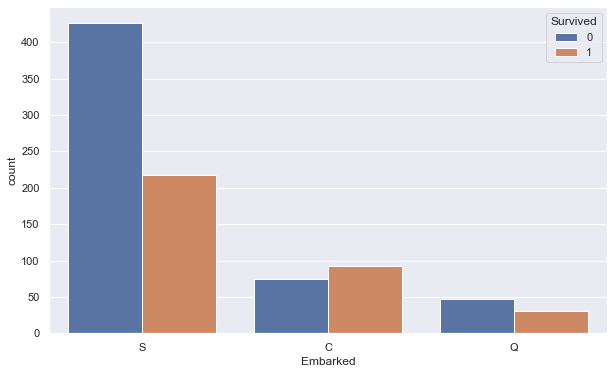

In [36]:
# ANALISANDO DE MANEIRA ABSOLUTA VEMOS QUE A MAIORIA DAS PESSOAS EMBARCARAM EM S
# E É EM S QUE OCORRE A MAIORIA DAS MORTES E TAMBEM DE SOBREVIVENTES, POREM PELA PROPORÇÃO É A MENOR.
plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x="Embarked", hue="Survived")

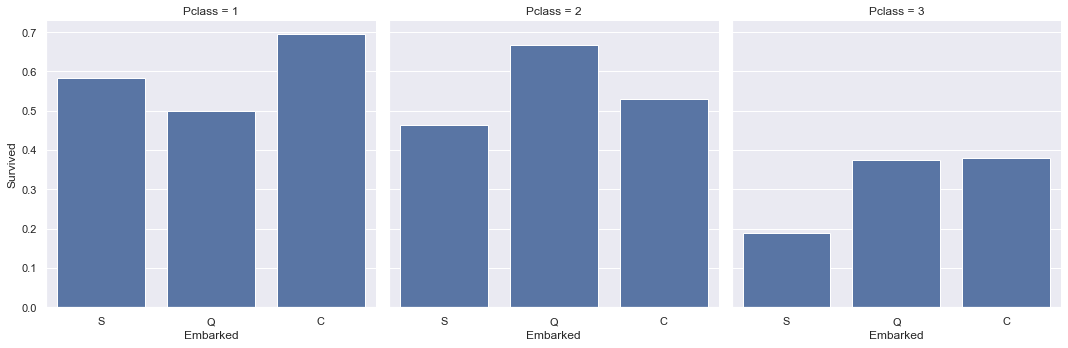

In [37]:
# DIVIDINDO POR CLASSE NOVAMENTE VEMOS QUE A CLASSE 3 TEM A MENOR PROPORÇÃO DE SOBREVIVENTES, POREM AGORA
# VEMOS QUE QUEM EMBARCOU EM Q E C TEM UMA PROPORÇÃO MAIOR DE SOBREVIVENTES.
grid = sns.FacetGrid(data=df_train, col="Pclass", height=5)
grid.map(sns.barplot, "Embarked", "Survived", ci=False, order=["S", "Q", "C"])

## Data Clean and Transform

### Missing Values - Age

In [38]:
print(f"\033[1m Missing Age Values\033[0m")
print(f"Total: {df['Age'].isnull().sum()}")

 Missing Age Values
Total: 263


In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
# ESSA IDEIA FOI RETIRADA DA REFERENCIA 1. 
# USANDO O TITULO DA PESSOA COMO UMA FEATURES E PARA CALCULAR A IDADE MEDIA PARA ADICIONAR AOS VALORES FALTANTES
df["Title"] = df["Name"].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df_train["Title"] = df_train["Name"].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df_test["Title"] = df_test["Name"].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [41]:
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

df_train["Title"] = df_train["Title"].map(normalized_titles)
df_test["Title"] = df_test["Title"].map(normalized_titles)
df["Title"] = df["Title"].map(normalized_titles)

In [42]:
grouped = df_train.groupby(['Sex','Pclass', 'Title'])
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [43]:
# ADICIONA AOS VALORES FALTANTES A MEDIA DA IDADE CALCULADA AGRUPANDO PELO TITULO, CLASSE E SEXO
df_train["Age"] = grouped["Age"].apply(lambda x: x.fillna(x.median()))
df_test["Age"] = grouped["Age"].apply(lambda x: x.fillna(x.median()))

### Missing Values - Cabin

In [44]:
# OUTRA IDEIA DA REFERICA 1. 
# PARA AS CABINES FALTANTES ADICIONA U DE Unknown
df_train["Cabin"] = df_train["Cabin"].fillna('U')
df_test["Cabin"] = df_test["Cabin"].fillna('U')

df_train["Cabin"] = df_train["Cabin"].map(lambda x: x[0])
df_test["Cabin"] = df_test["Cabin"].map(lambda x: x[0])

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

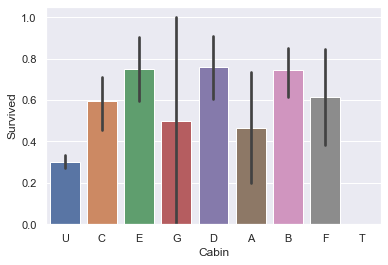

In [45]:
sns.barplot(data=df_train, x="Cabin", y="Survived")

In [46]:
# FARE TEM POUCOS VALOES FALTANDO
print(f"\33[1mMissing Embarked Values\33[0m")
print(f"Total: {df_train['Embarked'].isnull().sum()}")
print(f"Total: {df_test['Embarked'].isnull().sum()}")

Missing Embarked Values
Total: 2
Total: 0


## Missing Values - Embarked e Fare

In [48]:
# ADICIONA O MAIS COMUM
most_embarked = df_train["Embarked"].value_counts().index[0]

df_train["Embarked"] = df_train["Embarked"].fillna(most_embarked)
df_test["Embarked"] = df_test["Embarked"].fillna(most_embarked)

# ADICIONA A MEDIA DE FARE
df_train["Fare"] = df_train["Fare"].fillna(df_train["Fare"].median())
df_test["Fare"] = df_test["Fare"].fillna(df_train["Fare"].median())

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


## SibSP and Parch to FamilySize

In [51]:
# COMO JA COMENTADO, AQUI USO OUTRA IDEIA DA. REFERENCIA 1.
# SOMANDO OS PARENTES E CRIANDO UMA NOVA FEATURES
df_train['FamilySize'] = df_train["Parch"] + df_train["SibSp"] + 1
df_test['FamilySize'] = df_test["Parch"] + df_test["SibSp"] + 1                                  

## Age

In [52]:
# TRANSFORMA A IDADE EM UMA FEATURE DE CLASSIFICAÇÃO
pd.qcut(df_train["Age"], 5).value_counts()

(19.0, 26.0]     247
(0.419, 19.0]    201
(30.0, 40.0]     201
(40.0, 80.0]     151
(26.0, 30.0]      91
Name: Age, dtype: int64

In [53]:
df_train.loc[(df_train["Age"] >= 0) & (df_train["Age"] < 19), "Age"] = 0 
df_train.loc[(df_train["Age"] >= 19) & (df_train["Age"] < 25), "Age"] = 1
df_train.loc[(df_train["Age"] >= 25) & (df_train["Age"] < 32), "Age"] = 2
df_train.loc[(df_train["Age"] >= 32) & (df_train["Age"] < 42), "Age"] = 3
df_train.loc[(df_train["Age"] >= 42), "Age"] = 4

df_test.loc[(df_test["Age"] >= 0) & (df_test["Age"] < 19), "Age"] = 0 
df_test.loc[(df_test["Age"] >= 19) & (df_test["Age"] < 25), "Age"] = 1
df_test.loc[(df_test["Age"] >= 25) & (df_test["Age"] < 32), "Age"] = 2
df_test.loc[(df_test["Age"] >= 32) & (df_test["Age"] < 42), "Age"] = 3
df_test.loc[(df_test["Age"] >= 42), "Age"] = 4

## Fare

In [54]:
# FARE TAMBÉM
pd.qcut(df_train["Fare"], 5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [55]:
df_train.loc[(df_train["Fare"] >= 0) & (df_train["Fare"] < 8), "Fare"] = 0 
df_train.loc[(df_train["Fare"] >= 8) & (df_train["Fare"] < 11), "Fare"] = 1
df_train.loc[(df_train["Fare"] >= 11) & (df_train["Fare"] < 22), "Fare"] = 2
df_train.loc[(df_train["Fare"] >= 22) & (df_train["Fare"] < 42), "Fare"] = 3
df_train.loc[(df_train["Fare"] >= 42), "Fare"] = 4

df_test.loc[(df_test["Fare"] >= 0) & (df_test["Fare"] < 8), "Fare"] = 0 
df_test.loc[(df_test["Fare"] >= 8) & (df_test["Fare"] < 11), "Fare"] = 1
df_test.loc[(df_test["Fare"] >= 11) & (df_test["Fare"] < 22), "Fare"] = 2
df_test.loc[(df_test["Fare"] >= 22) & (df_test["Fare"] < 42), "Fare"] = 3
df_test.loc[(df_test["Fare"] >= 42), "Fare"] = 4

# Drop

In [56]:
# DROP FEATURES INUTEIS
df_train = df_train.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket'], axis=1)
df_test = df_test.drop(['Name','Ticket','SibSp','Parch','Ticket'], axis=1)

In [57]:
display(df_train.head())
display(df_test.head())

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,male,1.0,0.0,U,S,Mr,2
1,1,1,female,3.0,4.0,C,C,Mrs,2
2,1,3,female,2.0,0.0,U,S,Miss,1
3,1,1,female,3.0,4.0,C,S,Mrs,2
4,0,3,male,3.0,1.0,U,S,Mr,1


,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,male,1.0,0.0,U,Q,Mr,1
1,893,3,female,3.0,0.0,U,S,Mrs,2
2,894,2,male,2.0,1.0,U,Q,Mr,1
3,895,3,male,3.0,1.0,U,S,Mr,1
4,896,3,female,3.0,2.0,U,S,Mrs,3


### Change Sex Values

### Sex

In [58]:
# MAP female PARA 1 E male PARA 0
sex_map = {"male" : 0, "female" : 1}
df_train["Sex"] = df_train["Sex"].map(sex_map)
df_test["Sex"] = df_test["Sex"].map(sex_map)

## Get Dummies

In [59]:
# TRANSFORMA OS VALORES DAS LINAS EM FEATURES
train_len = df_train.shape[0]
test_len = df_test.shape[0]

In [60]:
df = pd.concat([df_train, df_test], sort=False)

In [61]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,PassengerId
0,0.0,3,0,1.0,0.0,U,S,Mr,2,NaN
1,1.0,1,1,3.0,4.0,C,C,Mrs,2,NaN
2,1.0,3,1,2.0,0.0,U,S,Miss,1,NaN
3,1.0,1,1,3.0,4.0,C,S,Mrs,2,NaN
4,0.0,3,0,3.0,1.0,U,S,Mr,1,NaN
...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,0,2.0,1.0,U,S,Mr,1,1305.0
414,NaN,1,1,4.0,4.0,C,C,Royalty,1,1306.0
415,NaN,3,0,2.0,0.0,U,S,Mr,1,1307.0
416,NaN,3,0,3.0,1.0,U,S,Mr,1,1308.0


In [62]:
df_dummie = pd.get_dummies(df)

In [63]:
df_train_dummie = df_dummie[:train_len]
df_test_dummie = df_dummie[train_len:]

In [64]:
df_test_dummie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       0 non-null      float64
 1   Pclass         418 non-null    int64  
 2   Sex            418 non-null    int64  
 3   Age            418 non-null    float64
 4   Fare           418 non-null    float64
 5   FamilySize     418 non-null    int64  
 6   PassengerId    418 non-null    float64
 7   Cabin_A        418 non-null    uint8  
 8   Cabin_B        418 non-null    uint8  
 9   Cabin_C        418 non-null    uint8  
 10  Cabin_D        418 non-null    uint8  
 11  Cabin_E        418 non-null    uint8  
 12  Cabin_F        418 non-null    uint8  
 13  Cabin_G        418 non-null    uint8  
 14  Cabin_T        418 non-null    uint8  
 15  Cabin_U        418 non-null    uint8  
 16  Embarked_C     418 non-null    uint8  
 17  Embarked_Q     418 non-null    uint8  
 18  Embarked_S

In [65]:
df_train_dummie.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,PassengerId,Cabin_A,Cabin_B,Cabin_C,...,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0.0,3,0,1.0,0.0,2,NaN,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,1.0,1,1,3.0,4.0,2,NaN,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,1.0,3,1,2.0,0.0,1,NaN,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,1.0,1,1,3.0,4.0,2,NaN,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.0,3,0,3.0,1.0,1,NaN,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [66]:
df_test_dummie.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,PassengerId,Cabin_A,Cabin_B,Cabin_C,...,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,NaN,3,0,1.0,0.0,1,892.0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,NaN,3,1,3.0,0.0,2,893.0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,NaN,2,0,2.0,1.0,1,894.0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,NaN,3,0,3.0,1.0,1,895.0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,NaN,3,1,3.0,2.0,3,896.0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [68]:
# CONVERT THE Survived TO INT, ON SOME PART OF CODE IT WAS TRANSFORMED TO FLOAT
df_train_dummie["Survived"] = df_train_dummie["Survived"].astype("int")

/var/folders/5w/c2mb1hls01j9g4bw7pt0qmt40000gn/T/ipykernel_14782/2433257863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_dummie["Survived"] = df_train_dummie["Survived"].astype("int")


In [69]:
# SALVA A FEATURES Survived PARA TRAINO
y_train = df_train["Survived"]
x_train = df_train_dummie.drop(["Survived", "PassengerId"], axis=1)

In [70]:
# SALVA O PassangerId PARA PODER CRIAR O ARQUIVO DE RESULTADO DEPOIS
x_test = df_test_dummie.drop(["PassengerId", "Survived"], axis=1)
passenge_id = df_test_dummie["PassengerId"].astype("int")

In [71]:
# CONVERTE ELE PARA INT
passenge_id = passenge_id.astype("int")

## Train

In [72]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score

# AQUI A IDEIA É TESTAR COM VÁRIOS MODELOS DIFERENTES E ESCOLHER O COM MELHOR RESULTADO

In [73]:
models = {"LogisticRegressionCV": LogisticRegressionCV(max_iter=1000), "DecisionTreeClassifier": DecisionTreeClassifier(), 
         "ExtraTreeClassifier": ExtraTreeClassifier(), "RandomForestClassifier": RandomForestClassifier(), 
         "KNeighborsClassifier": KNeighborsClassifier(), "GaussianNB": GaussianNB(), "SMV": SVC(),
         "CatBoostClassifier": CatBoostClassifier(verbose=False), "XGBClassifier" : XGBClassifier(use_label_encoder=False, eval_metric='rmse'), 
         "HistGradientBoostingClassifier": HistGradientBoostingClassifier(verbose=False)
         }

def calculateBestModel(x_train, y_train, model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    
    return accuracy_score(y_train, y_pred)

In [74]:
print("\033[1mCheck Best Model\n\033[0m")
print(f"{'Model Name':<34}{'Accuracy':>6}")

# DIVIDE ON TEST AND TRAIN
x_train_cl2, x_test_cl2, y_train2, y_test2 = train_test_split(x_train, y_train, test_size=0.3, random_state=45)

result_acc = {}
for model_name, model in models.items():
    acc = calculateBestModel(x_train, y_train, model)
    result_acc[model_name] = acc
    print(f"{model_name :.<33} {acc:>5}")

Check Best Model

Model Name                        Accuracy
LogisticRegressionCV............. 0.8372615039281706
DecisionTreeClassifier........... 0.9090909090909091
ExtraTreeClassifier.............. 0.9090909090909091
RandomForestClassifier........... 0.9090909090909091
KNeighborsClassifier............. 0.8484848484848485
GaussianNB....................... 0.7586980920314254
SMV.............................. 0.8338945005611672
CatBoostClassifier............... 0.8888888888888888
XGBClassifier.................... 0.9034792368125701


/Users/ivastival/opt/anaconda3/envs/boost/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


HistGradientBoostingClassifier... 0.8900112233445566


In [75]:
df_acc = pd.DataFrame.from_dict(result_acc, orient = 'index', columns=["Acc"])

In [76]:
# O MELHOR MODELOS
print(f"Max -> {df_acc.idxmax()[0]} = {df_acc.max()[0]}")

Max -> DecisionTreeClassifier = 0.9090909090909091


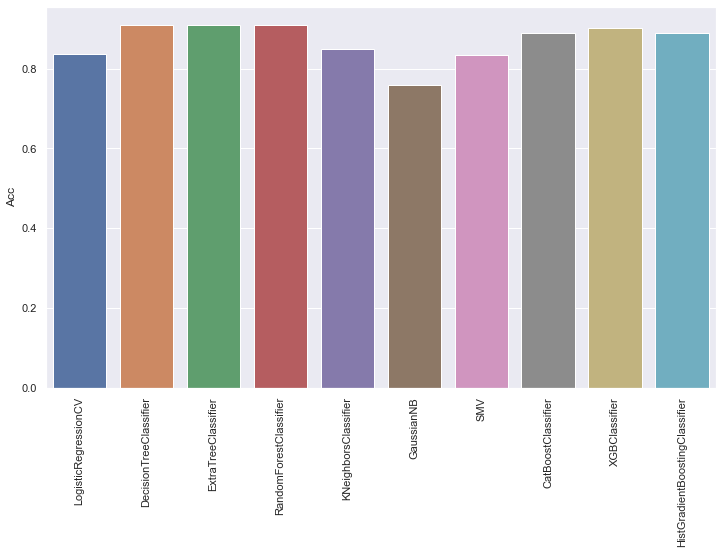

In [77]:
# PLOT ALL RESULTS
plt.figure(figsize=(12,7))
sns.barplot(data=df_acc, x=df_acc.index, y="Acc")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# COM ESSE SETUP EU CONSEGUI O MAXIMO DE 0.76... DE SCORE.

## RandomForest

In [88]:
# NA REFERENCIA 1 É USADO O GRIDSEARCH PARA ENCONTRAR O MELHOR SETUP DE VALORES
# USAREI O MESMO AQUI
RF=RandomForestClassifier(random_state=1)
PRF=[{'n_estimators':[10,100],'max_depth':[3,6],'criterion':['gini','entropy']}]
GSRF=GridSearchCV(estimator=RF, param_grid=PRF, scoring='accuracy',cv=2)
scores_rf=cross_val_score(GSRF,x_train,y_train,scoring='accuracy',cv=5)

In [89]:
# THE SCORE
np.mean(scores_rf)

0.8204444165463561

In [90]:
model=GSRF.fit(x_train, y_train)
pred=model.predict(x_test)
output=pd.DataFrame({'PassengerId':passenge_id,'Survived':pred})

In [ ]:
# COM ESSE SETUP CONSEGUI O MEU MELHOR SCORE
# Score: 0.79186
output.to_csv("../output/my_submission_31_03_GSRF_review_kaggle.csv", index=False)

In [ ]:
# BELLOW I TEST WITH SOME OTHERS MODELS ON KAGGLE, BUT THE RESULT WAS WORSE

## SVC

In [82]:
svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, x_train.astype(float), y_train,scoring='accuracy', cv=5)

In [83]:
np.mean(scores_svm)

0.8114619295712762

In [49]:
model=GSRF.fit(x_train, y_train)
pred=model.predict(x_test)
output=pd.DataFrame({'PassengerId':passenge_id,'Survived':pred})

In [53]:
Score: 0.76..
output.to_csv("../output/my_submission_31_03_GSSVM_review_kaggle.csv", index=False)

## XGBoost

In [91]:
model = XGBClassifier(use_label_encoder=False, eval_metric='rmse')
model.fit(x_train, y_train)
pred=model.predict(x_test)
output=pd.DataFrame({'PassengerId':passenge_id,'Survived':pred})

/Users/ivastival/opt/anaconda3/envs/boost/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [59]:
# Score: 0.76315
output.to_csv("../output/my_submission_31_03_XGBoostClassifier_review_kaggle.csv", index=False)